Reading Standard Workload File

In [22]:
with open('test.txt', 'r+', encoding='utf-8') as f:
    data = f.read().splitlines(True)
    
data = [ line.replace('\n', '').split('\t') for line in data if not line.startswith(';') and len(line)>3]
data = [[int(value) for value in line] for line in data]
print(data[:10])
print(len(data))

[[1, 0, 4, 14400, 100, -1, -1, 100, 14400, -1, 1, 1, 1, -1, 1, 1, -1, -1], [2, 37, 0, 14400, 100, -1, -1, 100, 14400, -1, 1, 1, 1, -1, 1, 1, -1, -1], [3, 76068, 9, 45, 20, -1, -1, 20, 3600, -1, 1, 2, 2, -1, 1, 1, -1, -1], [4, 108213, 16386, 154, 1, -1, -1, 1, 3600, -1, 1, 3, 3, -1, 1, 1, -1, -1], [5, 108300, 16977, 50, 1, -1, -1, 1, 3600, -1, 1, 3, 3, -1, 1, 1, -1, -1], [6, 108336, 16596, 1112, 1, -1, -1, 1, 3600, -1, 1, 3, 3, -1, 1, 1, -1, -1], [7, 113136, 11796, 176777, 1000, -1, -1, 1000, 259200, -1, 1, 4, 4, -1, 1, 1, -1, -1], [8, 125387, 206, 45, 2560, -1, -1, 2560, 172800, -1, 1, 3, 3, -1, 1, 1, -1, -1], [9, 125537, 112, 353, 10000, -1, -1, 10000, 172800, -1, 1, 3, 3, -1, 1, 1, -1, -1], [10, 126051, 197, 42, 2560, -1, -1, 2560, 172800, -1, 1, 3, 3, -1, 1, 1, -1, -1]]
114355


Converting it to pandas dataframe, removing not needed columns

In [50]:
import numpy as np
import pandas as pd

np_data = np.array(data, dtype=int)
print(np_data.shape)

labels = ['submit time', 'wait time', 'run time', 'proc used', 'requested number of proc', 'requested time', 'requested memory', 'user id']
np_data = np.delete(np_data, [0, 5, 6, 10, 12, 13, 14, 15, 16, 17], 1)
print(np_data.shape)
print(len(labels))
df = pd.DataFrame(np_data, columns=labels)
print(df.head())

(114355, 18)
(114355, 8)
8
   submit time  wait time  run time  proc used  requested number of proc  \
0            0          4     14400        100                       100   
1           37          0     14400        100                       100   
2        76068          9        45         20                        20   
3       108213      16386       154          1                         1   
4       108300      16977        50          1                         1   

   requested time  requested memory  user id  
0           14400                -1        1  
1           14400                -1        1  
2            3600                -1        2  
3            3600                -1        3  
4            3600                -1        3  


Grouping by user id

In [51]:
max_submit_time = df.max()['submit time']
df.pop('submit time')
df['count'] = df.groupby('user id')['user id'].transform('count')
grouped = df.groupby('user id').mean()
print(grouped.head())

            wait time      run time    proc used  requested number of proc  \
user id                                                                      
1         6654.854723  51115.181725   812.733573                812.733573   
2        13290.120127  12937.380801    85.509679                 85.509679   
3         6494.346939  44984.360544  1410.204082               1410.204082   
4         1788.579587   7938.150668   502.594168                502.594168   
5         6625.614035    634.929825     3.666667                  3.666667   

         requested time  requested memory   count  
user id                                            
1         188325.739220      11013.887577  1948.0  
2          28265.314240     341399.175020  3771.0  
3         141575.510204     291930.986395   147.0  
4          47142.211422         -1.000000   823.0  
5           2157.894737         -1.000000    57.0  


Visualizing data

In [59]:
import matplotlib.pyplot as plt
def plot_2d_scatter(X):
    fig, plot = plt.subplots()
    fig.set_size_inches(12, 12)
    plt.prism()

   

    dim0 = X[:, 0]
    dim1 = X[:, 1]
    label = "test"
    plot.scatter(dim0, dim1, label=label)
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.title("Workload logs")
    plt.tight_layout()
    plt.legend()
    plt.show()

In [62]:
from sklearn.manifold import TSNE

user_profiles = grouped.to_numpy()
user_profiles_tsne = TSNE(n_components=2, metric='euclidean', perplexity=30).fit_transform(user_profiles)

user_profiles_tsne.shape

/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(166, 2)

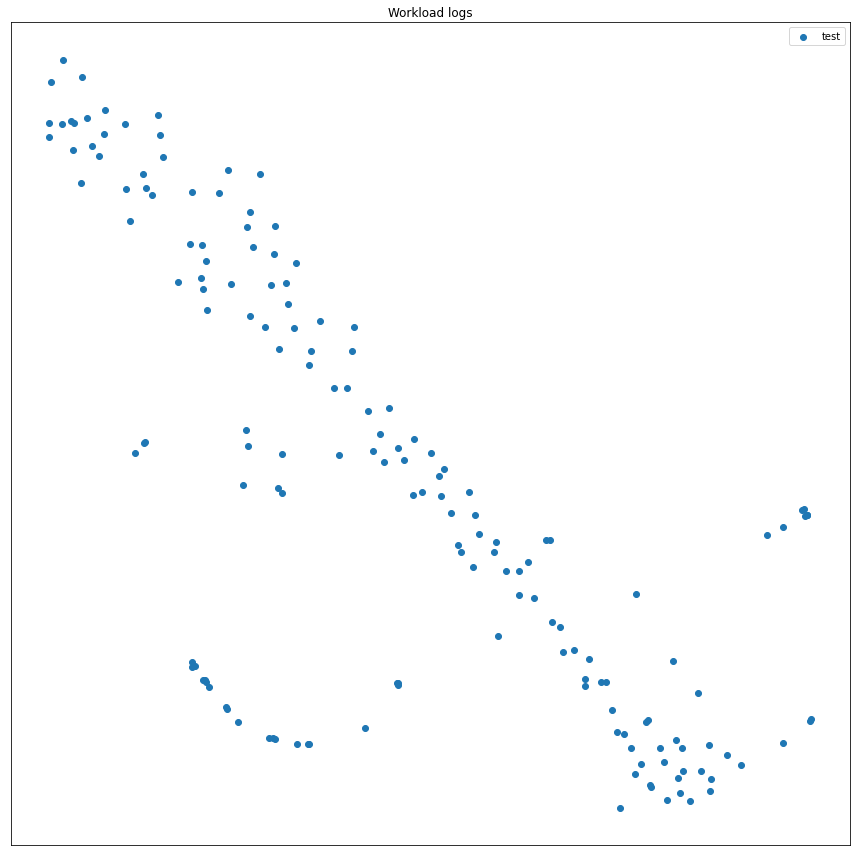

In [63]:
plot_2d_scatter(user_profiles_tsne)